In [1]:
import numpy as np 
import pandas as pd 
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import sparse
import warnings
import time
import sys
import os
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth',100)

In [2]:
train = pd.read_csv("./train.csv", encoding = 'gb18030')
test = pd.read_csv("./test.csv", encoding = 'gb18030')

In [13]:
train = train[train['score'] > 0.87]

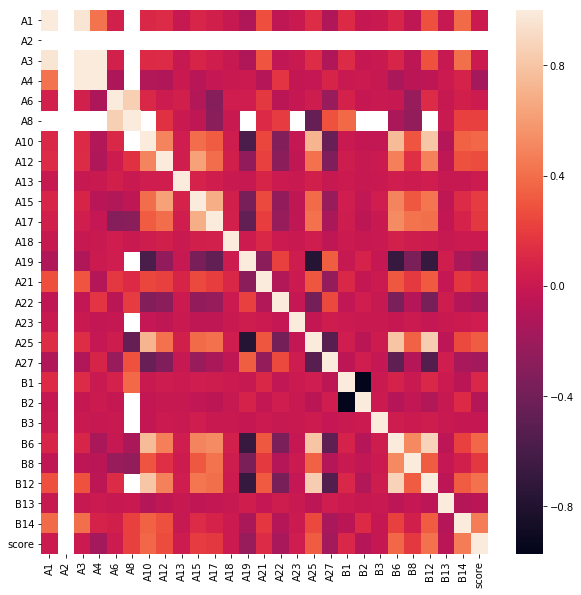

In [14]:
rel = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(rel)
plt.show()

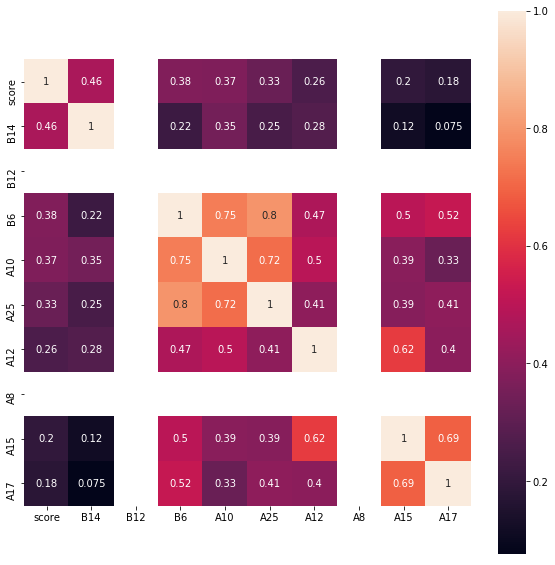

In [15]:
k = 10
cols = rel.nlargest(k, 'score')['score'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

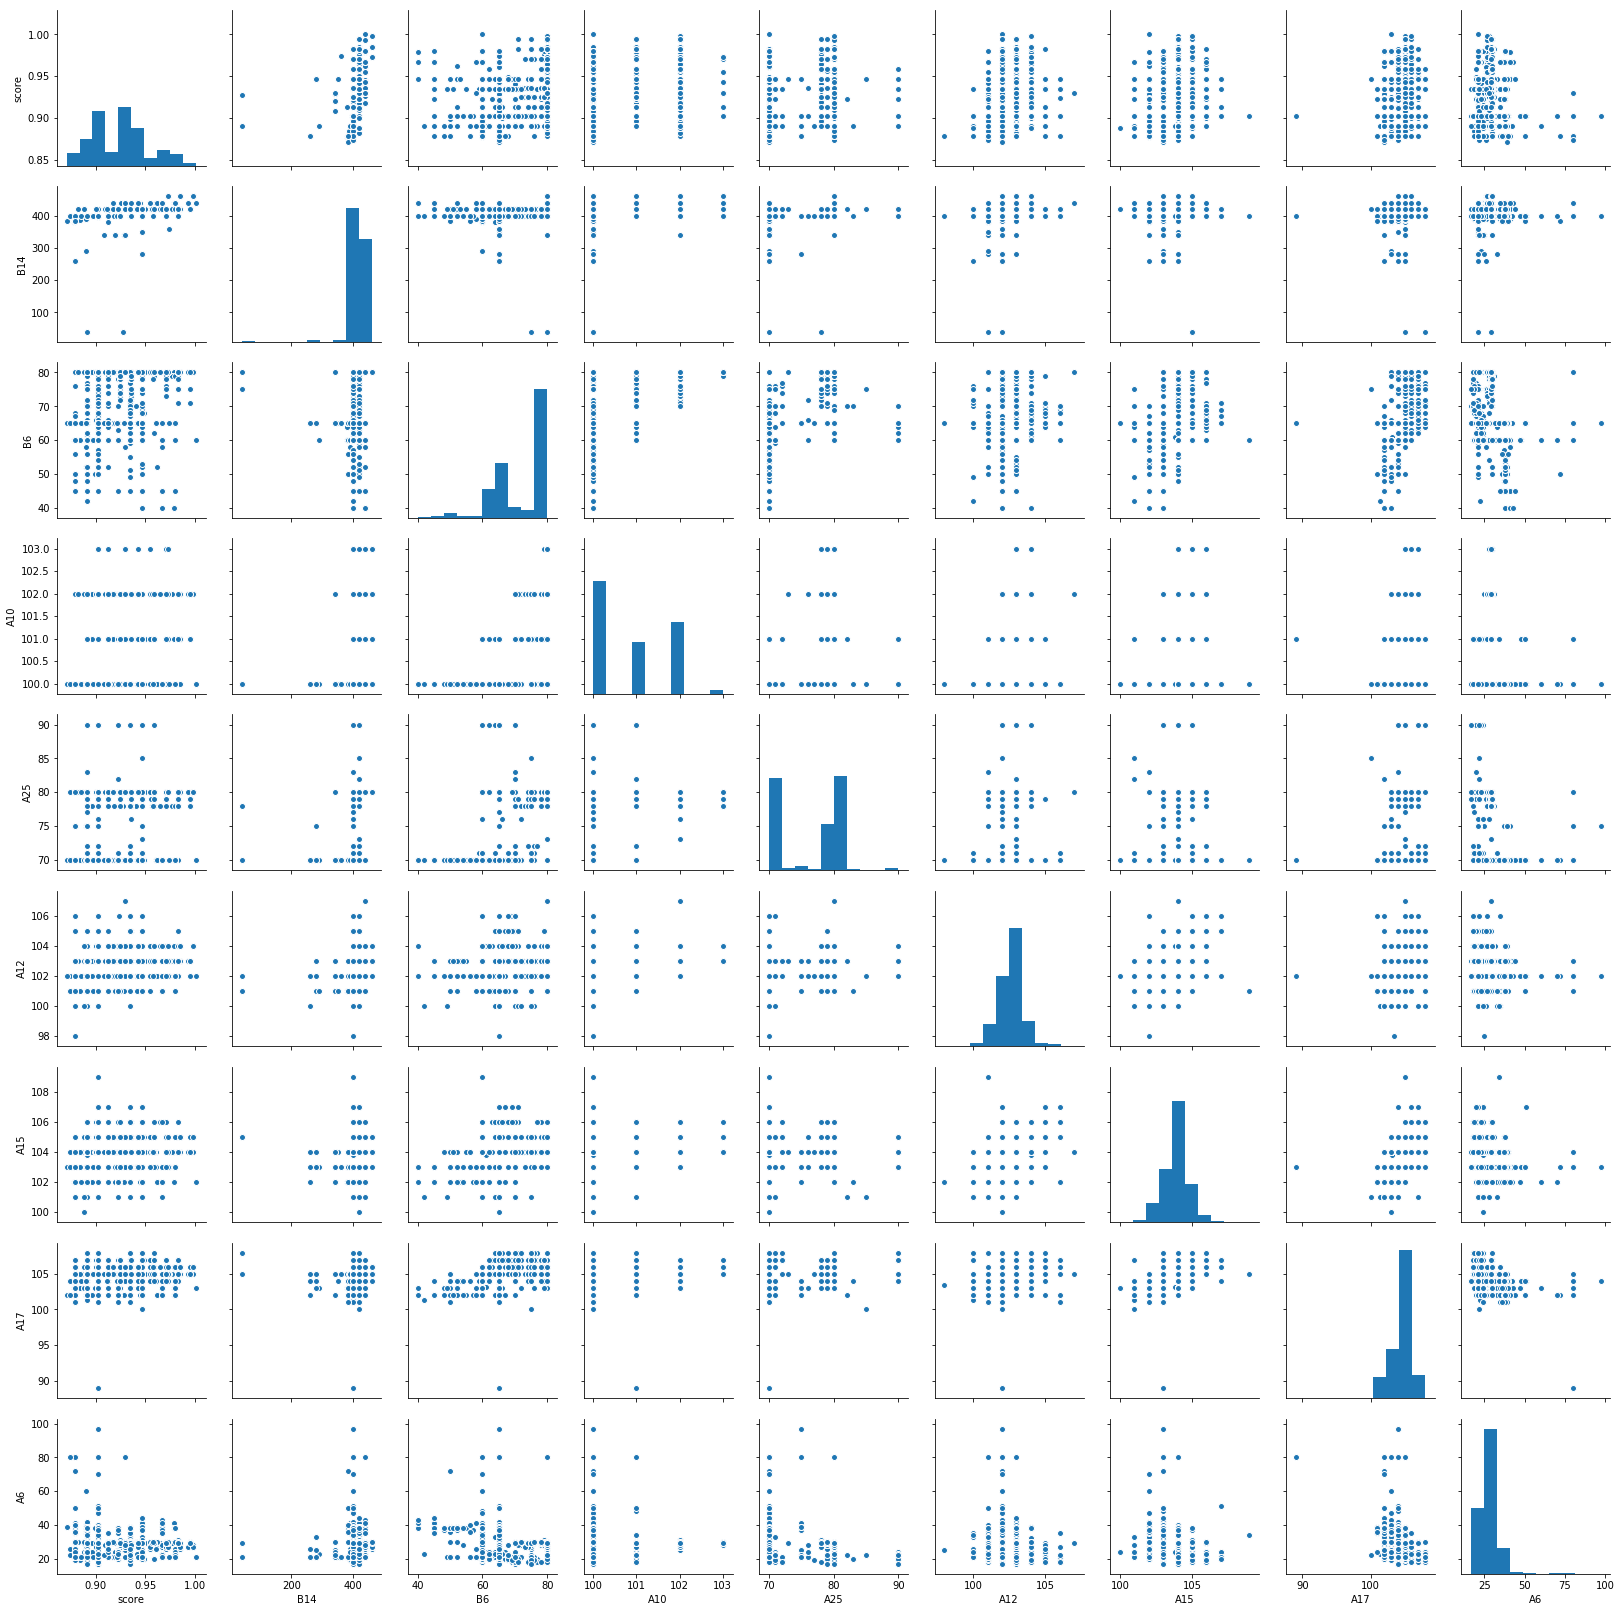

In [16]:
cols = ['score', 'B14', 'B6', 'A10', 'A25', 'A12', 'A15', 'A17', 'A6']
plt.figure(figsize=(10,10))
sns.pairplot(train[cols])
plt.show()